### NLP CARES - Cut offs


---

**Librarys**

In [1]:
import pandas as pd
import numpy as np
import pickle
from sklearn.metrics import roc_curve, roc_auc_score


from yellowbrick.classifier import ClassificationReport, DiscriminationThreshold, ROCAUC, ConfusionMatrix

/home/ubuntu/anaconda3/envs/NLP/lib/python3.7/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


---
**Import Dataset**

In [2]:
df_test = pd.read_hdf('../../data/test.h5', 'TEST')

In [3]:
df_test_main = df_test.drop([i for i in df_test.index if not df_test.loc[i, 'tokenized_sentences']])

**Import W2Vmodel**

In [4]:
W2Vmodel = pickle.load( open("../Final_Models/W2Vmodel.pickle", "rb"))

In [5]:
def get_w2v_features(w2v_model, sentence_group):
    """ Transform a sentence_group (containing multiple lists
    of words) into a feature vector. It averages out all the
    word vectors of the sentence_group.
    """
    words = np.concatenate(sentence_group)  # words in text
    index2word_set = set(w2v_model.wv.vocab.keys())  # words known to model
    
    featureVec = np.zeros(w2v_model.vector_size, dtype="float32")
    
    # Initialize a counter for number of words in a review
    nwords = 0
    # Loop over each word in the comment and, if it is in the model's vocabulary, add its feature vector to the total
    for word in words:
        if word in index2word_set: 
            featureVec = np.add(featureVec, w2v_model[word])
            nwords += 1.

    # Divide the result by the number of words to get the average
    if nwords > 0:
        featureVec = np.divide(featureVec, nwords)
    return featureVec

In [6]:
def Find_Optimal_Cutoff(target, predicted):
    """ Find the optimal probability cutoff point for a classification model related to event rate
    Parameters
    ----------
    target : Matrix with dependent or target data, where rows are observations

    predicted : Matrix with predicted data, where rows are observations

    Returns
    -------     
    list type, with optimal cutoff value

    """
    fpr, tpr, threshold = roc_curve(target, predicted)
    i = np.arange(len(tpr)) 
    roc = pd.DataFrame({'tf' : pd.Series(tpr-(1-fpr), index=i), 'threshold' : pd.Series(threshold, index=i)})
    roc_t = roc.iloc[(roc.tf-0).abs().argsort()[:1]]

    return list(roc_t['threshold']) 

---
### Est Ao

In [7]:
%%time

df_test = df_test_main.loc[df_test_main['est_Ao'].notnull(),]
df_test = df_test.reset_index(drop=True)


w2v_features_test = list(map(lambda sen_group: get_w2v_features(W2Vmodel, sen_group), df_test['tokenized_sentences']))
test_w2v = np.array(list(map(np.array, w2v_features_test)))
W=pd.DataFrame(test_w2v)
test = pd.concat([W, df_test], axis=1)

/home/ubuntu/anaconda3/envs/NLP/lib/python3.7/site-packages/ipykernel/__main__.py:16: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).


CPU times: user 2.55 s, sys: 0 ns, total: 2.55 s
Wall time: 2.56 s


In [8]:
X_test, y_test = test.iloc[:,0:200], test['est_Ao']

In [9]:
with open('../Final_Models/ML_model_est_Ao_SVM.pickle', 'rb') as f:
    model_est_Ao = pickle.load(f)

In [10]:
prob = model_est_Ao.predict_proba(X_test)

In [11]:
Find_Optimal_Cutoff(y_test,prob[:,1])

[0.18175879967296504]

In [12]:
roc_auc_score(y_test,prob[:,1])

0.9301808035714285

/home/ubuntu/anaconda3/envs/NLP/lib/python3.7/site-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)
/home/ubuntu/anaconda3/envs/NLP/lib/python3.7/site-packages/yellowbrick/classifier/base.py:232: YellowbrickWarning: could not determine class_counts_ from previously fitted classifier
  YellowbrickWarning,


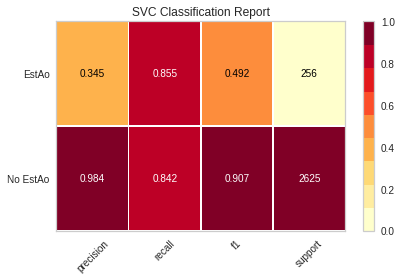

In [13]:
visualizer = ClassificationReport(model_est_Ao, classes=['No EstAo', 'EstAo'], support=True)

visualizer.score(X_test, y_test)
visualizer.poof();

/home/ubuntu/anaconda3/envs/NLP/lib/python3.7/site-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)
/home/ubuntu/anaconda3/envs/NLP/lib/python3.7/site-packages/yellowbrick/classifier/base.py:232: YellowbrickWarning: could not determine class_counts_ from previously fitted classifier
  YellowbrickWarning,


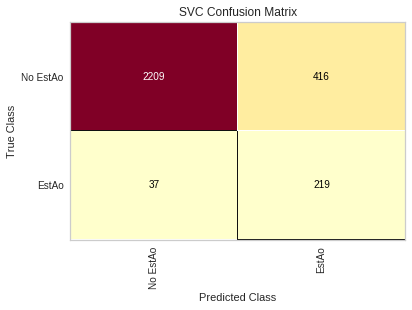

In [14]:
visualizer = ConfusionMatrix(model_est_Ao, classes=['No EstAo', 'EstAo'], support=True)

visualizer.score(X_test, y_test)
visualizer.poof();

---
### Est Mv

In [15]:
%%time

df_test = df_test_main.loc[df_test_main['est_Mv'].notnull(),]
df_test = df_test.reset_index(drop=True)


w2v_features_test = list(map(lambda sen_group: get_w2v_features(W2Vmodel, sen_group), df_test['tokenized_sentences']))
test_w2v = np.array(list(map(np.array, w2v_features_test)))
W=pd.DataFrame(test_w2v)
test = pd.concat([W, df_test], axis=1)

/home/ubuntu/anaconda3/envs/NLP/lib/python3.7/site-packages/ipykernel/__main__.py:16: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).


CPU times: user 2.56 s, sys: 54 µs, total: 2.56 s
Wall time: 2.57 s


In [16]:
X_test, y_test = test.iloc[:,0:200], test['est_Mv']

In [17]:
with open('../Final_Models/ML_model_est_Mv_SVM.pickle', 'rb') as f:
    model_est_Mv = pickle.load(f)

In [18]:
prob = model_est_Mv.predict_proba(X_test)

In [19]:
Find_Optimal_Cutoff(y_test,prob[:,1])

[0.07444412910629482]

In [20]:
roc_auc_score(y_test,prob[:,1])

0.9315829258133687

---
### Prot Ao

In [21]:
%%time

df_test = df_test_main.loc[df_test_main['prot_Ao'].notnull(),]
df_test = df_test.reset_index(drop=True)


w2v_features_test = list(map(lambda sen_group: get_w2v_features(W2Vmodel, sen_group), df_test['tokenized_sentences']))
test_w2v = np.array(list(map(np.array, w2v_features_test)))
W=pd.DataFrame(test_w2v)
test = pd.concat([W, df_test], axis=1)

/home/ubuntu/anaconda3/envs/NLP/lib/python3.7/site-packages/ipykernel/__main__.py:16: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).


CPU times: user 2.51 s, sys: 0 ns, total: 2.51 s
Wall time: 2.51 s


In [22]:
X_test, y_test = test.iloc[:,0:200], test['prot_Ao']

In [23]:
with open('../Final_Models/ML_model_prot_Ao_SVM.pickle', 'rb') as f:
    model_prot_Ao = pickle.load(f)

In [24]:
prob = model_prot_Ao.predict_proba(X_test)

In [25]:
Find_Optimal_Cutoff(y_test,prob[:,1])

[0.08574053986953362]

In [26]:
roc_auc_score(y_test,prob[:,1])

0.9800340284715284

---
### Prot Mv

In [27]:
%%time

df_test = df_test_main.loc[df_test_main['prot_Mv'].notnull(),]
df_test = df_test.reset_index(drop=True)


w2v_features_test = list(map(lambda sen_group: get_w2v_features(W2Vmodel, sen_group), df_test['tokenized_sentences']))
test_w2v = np.array(list(map(np.array, w2v_features_test)))
W=pd.DataFrame(test_w2v)
test = pd.concat([W, df_test], axis=1)

/home/ubuntu/anaconda3/envs/NLP/lib/python3.7/site-packages/ipykernel/__main__.py:16: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).


CPU times: user 2.49 s, sys: 119 µs, total: 2.49 s
Wall time: 2.5 s


In [28]:
X_test, y_test = test.iloc[:,0:200], test['prot_Mv']

In [29]:
with open('../Final_Models/ML_model_prot_Mv_SVM.pickle', 'rb') as f:
    model_prot_Mv = pickle.load(f)

In [30]:
prob = model_prot_Mv.predict_proba(X_test)

In [31]:
Find_Optimal_Cutoff(y_test,prob[:,1])

[0.04061234066440797]

In [32]:
roc_auc_score(y_test,prob[:,1])

0.9562670288054561

---
### Insf Ao

In [33]:
%%time

df_test = df_test_main.loc[df_test_main['insf_Ao'].notnull(),]
df_test = df_test.reset_index(drop=True)


w2v_features_test = list(map(lambda sen_group: get_w2v_features(W2Vmodel, sen_group), df_test['tokenized_sentences']))
test_w2v = np.array(list(map(np.array, w2v_features_test)))
W=pd.DataFrame(test_w2v)
test = pd.concat([W, df_test], axis=1)

/home/ubuntu/anaconda3/envs/NLP/lib/python3.7/site-packages/ipykernel/__main__.py:16: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).


CPU times: user 2.49 s, sys: 0 ns, total: 2.49 s
Wall time: 2.49 s


In [34]:
X_test, y_test = test.iloc[:,0:200], test['insf_Ao']

In [35]:
with open('../Final_Models/ML_model_insf_Ao_SVM.pickle', 'rb') as f:
    model_insf_Ao = pickle.load(f)

In [36]:
prob = model_insf_Ao.predict_proba(X_test)

In [37]:
Find_Optimal_Cutoff(y_test,prob[:,1])

[0.43998735140852135]

In [38]:
roc_auc_score(y_test,prob[:,1])

0.8665063015483343

---
### Insf Mv

In [39]:
%%time

df_test = df_test_main.loc[df_test_main['insf_Mv'].notnull(),]
df_test = df_test.reset_index(drop=True)


w2v_features_test = list(map(lambda sen_group: get_w2v_features(W2Vmodel, sen_group), df_test['tokenized_sentences']))
test_w2v = np.array(list(map(np.array, w2v_features_test)))
W=pd.DataFrame(test_w2v)
test = pd.concat([W, df_test], axis=1)

/home/ubuntu/anaconda3/envs/NLP/lib/python3.7/site-packages/ipykernel/__main__.py:16: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).


CPU times: user 2.5 s, sys: 0 ns, total: 2.5 s
Wall time: 2.9 s


In [40]:
X_test, y_test = test.iloc[:,0:200], test['insf_Mv']

In [41]:
with open('../Final_Models/ML_model_insf_Mv_SVM.pickle', 'rb') as f:
    model_insf_Mv = pickle.load(f)

In [42]:
prob = model_insf_Mv.predict_proba(X_test)

In [43]:
Find_Optimal_Cutoff(y_test,prob[:,1])

[0.64919676627638]

In [44]:
roc_auc_score(y_test,prob[:,1])

0.8888216687992241

## Busqueda de ejemplos

In [ ]:
cutoff = {}